In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import math

**Задача 1**

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [2]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], 
              [-0.18757272, 1.30337355, 5.12093014, 3.46363202], 
              [-0.81094525, 1.82463398, 5.79686488, 1.86159445], 
              [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], 
              [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], 
              [-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
              [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], 
              [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
              [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], 
              [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

In [3]:
y =np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 
             7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

Определение сочетания столбцов для анализа:

In [4]:
space = []
for i in range (X.shape[1]):
    for j in range (X.shape[1]):
        if i==j:
            continue        
        space.append((i, j))
       
space

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2)]

In [5]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3
0,1.224013,2.308685,3.036364,2.692872
1,-0.187573,1.303374,5.120930,3.463632
2,-0.810945,1.824634,5.796865,1.861594
3,0.751290,2.673921,3.655298,1.667461
4,0.009724,1.973673,2.505943,1.697552


In [6]:
list_of_coef = []
for elem in space:
    df_internal = df[[elem[0], elem[1]]]
    model_task_1 = LinearRegression().fit(df_internal, y)
    b0 = model_task_1.intercept_
    b1, b2 = (model_task_1.coef_)
    print(b0, b1, b2)
    list_of_coef.append((b0, b1, b2))   
    

6.70781579049774 0.4078684103057995 1.0336024709417702
3.6245569493851137 1.6253120321108065 1.2113497931202983
5.7068612323509935 0.6835994852190962 1.126507070741747
6.70781579049774 1.0336024709417702 0.4078684103058002
2.488961928568431 1.6061195600599558 0.86269914636502
1.916852207680499 1.7437366723123868 1.319718815458464
3.624556949385111 1.2113497931202992 1.6253120321108077
2.4889619285684272 0.8626991463650208 1.606119560059956
3.64001085991419 0.7075391440843418 1.0485174544175302
5.7068612323509935 1.1265070707417468 0.6835994852190964
1.9168522076804946 1.3197188154584651 1.7437366723123873
3.6400108599141925 1.04851745441753 0.7075391440843413


In [7]:
list_of_coef = np.array(list_of_coef)

Вычисление R^2 и коэффициента Фишера для каждого из сочетаний

In [8]:
def sum_of_squares(array):
    return((array - array.mean())**2).sum()

In [9]:
n_1 = X.shape[0]
n_1

10

In [10]:
m_1 = 2

In [11]:
k1_1 = m_1
k2_1 = n_1 - m_1 - 1
k1_1, k2_1

(2, 7)

In [12]:
alpha = 0.05
t_1 = stats.f.ppf(1 - alpha, k1_1, k2_1)
t_1

4.73741412777588

Вычисление максимального уровня значимости

In [13]:
def r2_score(data_array, x1, x2, list_of_coef, y):
    int_r1_max = 0
    x1_max, x2_max = None, None
    coef_row = None

    for koef_line in list_of_coef:
        b0 = koef_line[0]    
        b1 = koef_line[1]
        b2 = koef_line[2]    
        
        z=b0 + b1 *data_array[x1] + b2 * data_array[x2]
        R1 = 1 - (((y - z)**2).sum()/sum_of_squares(y))
        if int_r1_max < R1:
            int_r1_max = R1
            x1_max, x2_max = x1, x2
            coef_row = (b0, b1, b2)
            
    #print(R1)
    #return R1
    return int_r1_max, x1_max, x2_max, coef_row

In [14]:
max_r1 = 0
max_coef = None
max_rows = None
for i in range (list_of_coef.shape[0]):
    row_1, row_2 = space[i][0], space[i][1]
    R1, row_1_max, row_2_max, coef_row = r2_score(df[[row_1, row_2]], row_1, row_2, list_of_coef, y)
    
    if R1 > max_r1:
        max_r1 = R1
        max_coef = coef_row
        max_rows = (row_1_max, row_2_max)
        
print(max_r1)
print(max_coef)
print(max_rows)

0.7634246238793151
(3.624556949385111, 1.2113497931202992, 1.6253120321108077)
(2, 0)


In [17]:
params = None

F = (max_r1 / k1_1) / ((1 - max_r1) / k2_1)
F

11.294439122922642

Значение F для максимального знасения R^2=0,76 составляет 25.82, что больше критической величины t1 = 4.73.
Можно предположить, что уравнение значимо.

**Задача 2**

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.  
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.  
Посчитайте коэффициент детерминации.  
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.  
(доп) Посчитать среднюю ошибку аппроксимации  

In [18]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [19]:
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Формулы парной регресии


In [20]:
def lsq (x, y):
    b1 = (np.mean(y*x) - (np.mean(y) * np.mean(x)))/(np.mean(x**2) - np.mean(x)**2)
    b0 = np.mean(y) - b1 * np.mean(x)
    return b1, b0


In [21]:
lsq(salary, scoring)

(2.620538882402765, 444.1773573243596)

Модель линейной регресии:  
y = 444.18 + 2.62*x

Метод наименьших квадрратов

In [22]:
salary_pd = pd.DataFrame(salary)
scoring_pd = pd.DataFrame(scoring)

In [23]:
salary_pd.shape

(10, 1)

In [24]:
ones = np.ones((salary_pd.shape[0], 1))
salary_pdo = np.hstack((ones, salary_pd))
salary_pdo.shape

(10, 2)

In [25]:
salary_pdo


array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [26]:
XTX = salary_pdo.T.dot(salary_pdo)
XTX

array([[1.00000e+01, 1.01400e+03],
       [1.01400e+03, 1.37766e+05]])

определитель

In [27]:
np.linalg.det(XTX)

349464.00000000023

Определитель не равен нулю, поэтому, продолжаем

In [28]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.94220864e-01, -2.90158643e-03],
       [-2.90158643e-03,  2.86152508e-05]])

In [29]:
b = XTX_inv.dot(salary_pdo.T).dot(scoring)
b

array([444.17735732,   2.62053888])

полученные величины равны величинам, полученным пл формулам парной регрессии

**Скаттерплот**

In [56]:
b1_2 = b[1]
b0_2 = b[0]

Text(0, 0.5, 'scoring')

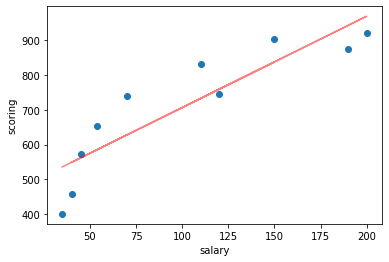

In [57]:
ox = salary
oy = b0_2 + b1_2*ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color = 'red', alpha = 0.5)
plt.xlabel('salary')
plt.ylabel('scoring')

Расчет при помощи стандартного модуля

In [45]:
model_1 = LinearRegression().fit(salary_pdo, scoring)
model_1.intercept_

444.1773573243595

In [46]:
model_1.coef_

array([0.        , 2.62053888])

**коэффициент детерминации**

Предсказанные значения:

In [58]:
z1=b0_2 + b1_2 *salary

In [59]:
def sum_of_squares(array):
    return((array - array.mean())**2).sum()

Расчет R2:

In [60]:
R2 = 1 - ((scoring - z1)**2).sum()/sum_of_squares(scoring)
R2

0.7876386635293686

**F-критерий Фишера**

In [61]:
n = salary.shape[0]
m = 1

In [62]:
k1 = m
k2 = n - m - 1
k1, k2

(1, 8)

In [63]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

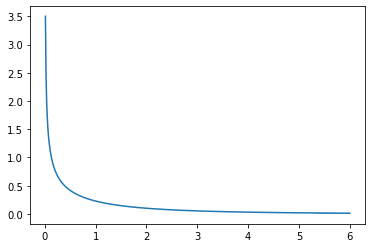

In [64]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [65]:
F = (R2 / k1) / ((1 - R2) / k2)
F

29.67164085966451

Значение F лежит правее левой границы критической области. Можно считать уравнение значимым.

**Средняя ошибка апроксимации**

In [66]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [67]:
mean_approximation_error(scoring, z1)

0.11469251843561709

Проверка величин

In [69]:
import statsmodels.api as sm


In [76]:
ones = np.ones((salary.shape[0], 1))

In [78]:
salary_df = pd.DataFrame(salary.T)
scoring_df = pd.DataFrame(scoring.T)

In [80]:
salary_df = np.hstack((ones, salary_df))

In [83]:
model = sm.OLS(scoring_df, salary_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           0.000611
Time:                        18:27:57   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
